# Mexit better

In [1]:
# HDI by Ariadna

In [2]:
# Dependencies and Setup
# %matplotlib inline
# %matplotlib notebook
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import matplotlib.colors
import requests
import geopandas as gpd

from config_maps import gkey

tablamun=pd.read_csv("Table/indicadores_municipios.csv",  encoding ='latin1')
pd.set_option('display.max_columns', 500)
# tablamun.head()
# tablamun.count()
# tablamun.dtypes

### Create dataframe for CDMX

In [3]:

cdmx= tablamun.loc[tablamun["id_edo"] == 9, :]
cdmx = cdmx.rename(columns = {"id_edo": "State ID", "edo": "State" , "id_mun":"Municipality ID", 
                          "municipio" : "Municipality", "escolaridad": "Average years of school",
                         "idh": "Human Development Index", "ictpc_mun_2010": "Average per capita income"}) 
cdmx["State per capita income"] = cdmx["Average per capita income"].mean()
cdmx["State HDI"] = cdmx["Human Development Index"].mean()
cdmx["HDI ranking"]= cdmx["Human Development Index"].rank(ascending=False)

# cdmx.head()

### Create dataframe for EdoMex

In [4]:
edomex= tablamun.loc[tablamun["id_edo"] == 15, :]
edomex = edomex.rename(columns = {"id_edo": "State ID", "edo": "State" , "id_mun":"Municipality ID", 
                          "municipio" : "Municipality", "escolaridad": "Average years of school",
                         "idh": "Human Development Index", "ictpc_mun_2010": "Average per capita income"}) 
edomex["State per capita income"] = edomex["Average per capita income"].mean()
edomex["State HDI"] = edomex["Human Development Index"].mean()
edomex["HDI ranking"]= edomex["Human Development Index"].rank(ascending=True)
# edomex.head()
# edomex.describe()


### Create dataframe both sets

In [5]:
tabla_tot = pd.concat([cdmx, edomex])
tabla_tot["HDI Ranking CDMX & Edomex"]= tabla_tot["Human Development Index"].rank(ascending=True)
# tabla_tot.head()

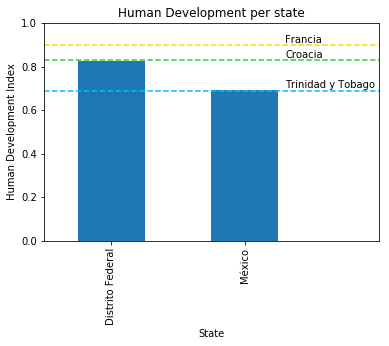

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a group based on states
state_group = tabla_tot.groupby('State')
state_idh=state_group['Human Development Index'].mean()

# Create a bar chart 
state_idh_graph = state_idh.plot(kind='bar')

plt.xlim(-0.5, 2)
plt.ylim(0, 1)


# Set the xlabel and ylabel using class methods
state_idh_graph.set_xlabel("State")
state_idh_graph.set_ylabel("Human Development Index")


plt.axhline(y=0.830, color='limegreen', linestyle='--')
plt.text(1.3,0.84, 'Croacia')
plt.axhline(y=0.901, color='gold', linestyle='--')
plt.text(1.3,0.91, 'Francia')
plt.axhline(y=0.69, color='deepskyblue', linestyle='--')
plt.text(1.3,0.70, 'Trinidad y Tobago')
plt.title("Human Development per state")
plt.show()
plt.tight_layout()

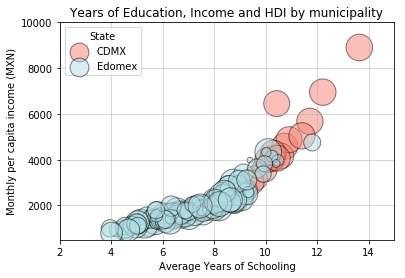

<Figure size 1440x1440 with 0 Axes>

In [7]:
# Build the scatter plot
fig, ax = plt.subplots()

plt.scatter(cdmx["Average years of school"], cdmx["Average per capita income"], marker="o", facecolors="salmon", edgecolors="black", 
             s=tabla_tot["HDI Ranking CDMX & Edomex"]*5, alpha=0.5, label="CDMX")
plt.scatter(edomex["Average years of school"], edomex["Average per capita income"], marker="o", facecolors="powderblue", edgecolors="black", 
              s=tabla_tot["HDI Ranking CDMX & Edomex"]*5 ,alpha=0.5,  label="Edomex")

# Incorporate the other graph properties

plt.xlim(2, 15)
plt.ylim(500, 10000)
ax.grid(linestyle='-', linewidth='0.5',)
plt.title('Years of Education, Income and HDI by municipality')

plt.xlabel('Average Years of Schooling')
plt.ylabel('Monthly per capita income (MXN)')

# Create a legend
plt.legend(loc="best", fancybox=True, title="State")

# # Incorporate a text label regarding circle size
# plt.text(42,35, 'Note:\nCircle size correlates with driver count per City')

# # Save Figure
# plt.savefig('PyberScatterPlot.png')
plt.figure(figsize=(20,20))
#Show plot
plt.show()

/home/erick/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



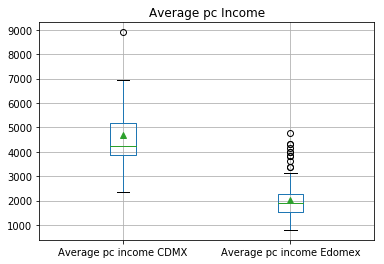

In [8]:
# Income quartiles

cdmx["Average per capita income"].describe()
edomex["Average per capita income"].describe()

# Income stats
cdmx_q1 = np.percentile(cdmx["Average per capita income"], 25)
cdmx_q3 = np.percentile(cdmx["Average per capita income"], 75)
cdmx_max = np.max(cdmx["Average per capita income"])
cdmx_min = np.min(cdmx["Average per capita income"])
cdmx_mean = np.mean(cdmx["Average per capita income"])

edomex_q1 = np.percentile(edomex["Average per capita income"], 25)
edomex_q3 = np.percentile(edomex["Average per capita income"], 75)
edomex_max = np.max(edomex["Average per capita income"])
edomex_min = np.min(edomex["Average per capita income"])
edomex_mean = np.mean(edomex["Average per capita income"])

# Outliers

cdmx_iqr = (cdmx_q3 - cdmx_q1)
cdmx_lb = cdmx_q1 - (1.5 * cdmx_iqr)
cdmx_ub = cdmx_q3 + (1.5 * cdmx_iqr)

cdmx['Very high income'] = cdmx['Average per capita income'].apply(lambda x: 1 if x >=cdmx_ub else 0)
cdmx['Very low income'] = cdmx['Average per capita income'].apply(lambda x: 1 if x <=cdmx_lb else 0)


edomex_iqr = (edomex_q3 - edomex_q1)
edomex_lb = edomex_q1 - (1.5 * edomex_iqr)
edomex_ub = edomex_q3 + (1.5 * edomex_iqr)

edomex['Very high income'] = edomex['Average per capita income'].apply(lambda x: 1 if x >=edomex_ub else 0)
edomex['Very low income'] = edomex['Average per capita income'].apply(lambda x: 1 if x <=edomex_lb else 0)

# Create bins
cdmx_bins = [cdmx_min-1, cdmx_q1,cdmx_mean,cdmx_q3 , cdmx_max+1]
cdmx_bins
edomex_bins = [edomex_min-1, edomex_q1,edomex_mean,edomex_q3 , edomex_max+1]
edomex_bins

# Create the names for the  bins
bins_names = [1, 2, 3, 4]

# Assign to bins based on average income
cdmx["Per capita income quartile"] = pd.cut(cdmx["Average per capita income"], cdmx_bins, labels=bins_names)
edomex["Per capita income quartile"] = pd.cut(edomex["Average per capita income"], edomex_bins, labels=bins_names)
edomex

cdmx["Average pc income CDMX"]=cdmx["Average per capita income"]
edomex["Average pc income Edomex"]=edomex["Average per capita income"]
cdmx["State"] = "CDMX"
edomex["State"] = "Edomex"

cdmx
tabla_tot2 = pd.concat([cdmx, edomex])

# Income boxplot 

tabla_tot2.boxplot(column=["Average pc income CDMX", "Average pc income Edomex"],  showmeans=True)
plt.title("Average pc Income")
# plt.grid()
plt.show()


In [9]:
tabla_tot2.sort_values('Average per capita income', ascending=False)

,Average pc income CDMX,Average pc income Edomex,Average per capita income,Average years of school,HDI ranking,Human Development Index,Municipality,Municipality ID,Per capita income quartile,State,State HDI,State ID,State per capita income,Very high income,Very low income
12,8902.0,NaN,8902,13.640000,1.0,0.917,Benito Juárez,14,4,CDMX,0.823875,9,4698.875,1,0
14,6950.0,NaN,6950,12.220000,2.0,0.880,Miguel Hidalgo,16,4,CDMX,0.823875,9,4698.875,0,0
2,6449.0,NaN,6449,10.430000,7.0,0.825,Cuajimalpa de Morelos,4,4,CDMX,0.823875,9,4698.875,0,0
1,5674.0,NaN,5674,11.720000,3.0,0.867,Coyoacán,3,4,CDMX,0.823875,9,4698.875,0,0
13,5042.0,NaN,5042,11.410000,4.0,0.848,Cuauhtémoc,15,3,CDMX,0.823875,9,4698.875,0,0
10,4871.0,NaN,4871,10.910000,6.0,0.829,Tlalpan,12,3,CDMX,0.823875,9,4698.875,0,0
69,NaN,4753.0,4753,11.810000,125.0,0.825,Metepec,54,4,Edomex,0.690456,15,2032.072,1,0
0,4588.0,NaN,4588,10.740000,5.0,0.832,Azcapotzalco,2,2,CDMX,0.823875,9,4698.875,0,0
28,NaN,4339.0,4339,10.100000,121.0,0.797,Atizapán de Zaragoza,13,4,Edomex,0.690456,15,2032.072,1,0
52,NaN,4324.0,4324,10.030000,117.0,0.773,Huixquilucan,37,4,Edomex,0.690456,15,2032.072,1,0


In [10]:
# Población total y por género by Ingrid

In [11]:
### GRAN TABLA ###

GT=pd.read_csv("Table/GranTablaCDMX&Metro.csv", encoding='utf-8')
GT.head()

,Unnamed: 0,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBMAS,POBFEM,REL_H_M,P_18YMAS,P_60YMAS,P_0A2,P_3A5,P_6A11,P_12A14,P_15A17,P_18A24,PEA,PE_INAC,POCUPADA,PDESOCUP,PSINDER,PDER_SS,TVIVHAB,VIVPAR_HAB,PROM_OCUP,GRAPROES,Entidad federativa,Nombre del municipio,Nombre de la localidad,Folio de la AGEB,Población total,Viviendas particulares habitadas,Población de 15 años y más con educación básica incompleta,Población de 15 a 24 años que no asiste a la escuela,Población sin derechohabiencia a servicios de salud,Personas que viven en hacinamiento,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Población de 15 años o más analfabeta,Población de 6 a 14 años que no asiste a la escuela,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica,Grado de rezago social (clases latentes)
0,0,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0010,0,3424,1600,1824,88,2650,822,71,77,235,129,137,298,1398,1511,1307,91,766,2531,856,815,4,11,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010010,3424.0,815.0,25.2,37.5,22.4,0.4,0.7,6.5,1.4,7.9,1.1,0.5,0.6,0.1,0.1,0.0,Bajo
1,1,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0025,0,5912,2819,3093,91,4426,974,206,241,466,212,261,622,2692,2197,2529,163,1059,4751,1597,1565,4,10,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010025,5912.0,1565.0,30.3,46.0,17.9,0.6,0.3,14.4,2.9,16.3,1.8,1.9,0.0,0.0,0.0,0.0,Bajo
2,2,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,003A,0,4638,2249,2389,94,3418,902,157,137,347,202,197,478,1947,1855,1818,129,878,3571,1183,1124,4,10,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,090020001003A,4638.0,1124.0,31.7,46.2,18.9,0.8,0.3,11.4,1.6,15.6,2.3,2.9,0.0,0.1,0.1,0.0,Bajo
3,3,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0044,0,5007,2316,2691,86,3708,993,148,162,391,178,203,459,2066,2016,1936,130,1053,3729,1342,1270,4,10,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010044,5007.0,1270.0,27.9,39.4,21.0,0.4,0.4,11.4,2.2,13.5,1.6,2.5,0.2,0.1,0.0,0.0,Bajo
4,4,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0097,0,2260,1076,1184,91,1756,523,56,82,150,80,88,202,923,993,886,37,448,1755,575,558,4,11,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010097,2260.0,558.0,26.8,34.5,19.8,0.2,0.2,8.1,1.1,7.2,1.6,3.5,0.4,0.0,0.0,0.0,Bajo


In [12]:
keys1 = [GT.keys()[i] for i in range(9,31)]
keys2 = [GT.keys()[j] for j in range(36,51)]
# keys.append(GT.keys/()[9:31])/

keys = keys1 + keys2

In [13]:
for k in keys:
    GT[k] = GT[k].replace('*', 'NaN')
    GT[k] = GT[k].astype(float)

In [14]:
print(GT.groupby('NOM_ENT')['ENTIDAD'].unique())

NOM_ENT
Distrito Federal     [9]
México              [15]
Name: ENTIDAD, dtype: object


In [15]:
## Agregar modulo try

Estado=input("Enter your states number : ") 

filtro_estado = GT.loc[GT['ENTIDAD'] == int(Estado)].copy()
# filtro_estado

Enter your states number : 9


In [16]:
print(filtro_estado.groupby('NOM_MUN')['MUN'].unique())

NOM_MUN
Azcapotzalco               [2]
Benito Juárez             [14]
Coyoacán                   [3]
Cuajimalpa de Morelos      [4]
Cuauhtémoc                [15]
Gustavo A. Madero          [5]
Iztacalco                  [6]
Iztapalapa                 [7]
La Magdalena Contreras     [8]
Miguel Hidalgo            [16]
Milpa Alta                 [9]
Tlalpan                   [12]
Tláhuac                   [11]
Venustiano Carranza       [17]
Xochimilco                [13]
Álvaro Obregón            [10]
Name: MUN, dtype: object


In [17]:
Municipio=input("Enter your municipality number : ")

filtro_mun = filtro_estado.loc[filtro_estado['MUN'] == int(Municipio)].copy()

Enter your municipality number : 3


In [18]:
pobxmun=filtro_mun.groupby(['MUN'])['POBTOT'].sum().reset_index(drop=False)
# pobxmun=pobxmun.loc[(pobxmun['NOM_MUN']==Municipio),:]
pobxmun=pobxmun.iloc[0,1].astype(float)

pobxent=filtro_estado.groupby(['ENTIDAD'])['POBTOT'].sum().reset_index(drop=False)
# pobxent=pobxent.loc[(pobxent['NOM_ENT']==Estado),:]
pobxent=pobxent.iloc[0,1].astype(float)


#pobxent=GT.groupby(['NOM_ENT'])['POBTOT'].sum().reset_index(drop=False)
# pobxageb=GT.loc[(GT['NOM_ENT']==Estado)&(GT['NOM_MUN']==Municipio),:]
pobxageb=filtro_mun.sort_values(by='POBTOT',ascending=False)
pobxageb=pobxageb.iloc[1:10,[7,9]]
pobxageb['% Poblacion por Entidad']=pobxageb['POBTOT'].astype(float)/pobxent.astype(float)*100
pobxageb['% Poblacion por Municipio']=pobxageb['POBTOT'].astype(float)/pobxmun.astype(float)*100
# pobxageb

In [19]:
# Búsqueda por género

Genero=input("Enter the desirable gender of your potencial clients(if you do not care(x)) w/m/x: ") 

Enter the desirable gender of your potencial clients(if you do not care(x)) w/m/x: w


In [20]:
gender=filtro_mun[["NOM_ENT","NOM_MUN","AGEB","REL_H_M"]]
if Genero=="x":
    pass
elif Genero=="w":
    gender=gender.sort_values(by='REL_H_M',ascending=True)
    print(gender.head(10))
elif Genero=="m":
    gender=gender.sort_values(by='REL_H_M',ascending=False)
    print(gender.head(10))

              NOM_ENT   NOM_MUN  AGEB  REL_H_M
112  Distrito Federal  Coyoacán  0111     67.0
107  Distrito Federal  Coyoacán  0060     77.0
109  Distrito Federal  Coyoacán  008A     77.0
114  Distrito Federal  Coyoacán  0130     77.0
104  Distrito Federal  Coyoacán  0037     78.0
194  Distrito Federal  Coyoacán  1105     78.0
130  Distrito Federal  Coyoacán  0304     78.0
124  Distrito Federal  Coyoacán  0234     79.0
181  Distrito Federal  Coyoacán  0906     79.0
141  Distrito Federal  Coyoacán  0427     79.0


In [21]:
ageb_keys = gender['AGEB'][0:10]
# ageb_keys

In [22]:
# Código by Leon

In [23]:
edades_file = "Table/Edades.csv"
actividades_file = "Table/Actividades.csv"

edades_csv = pd.read_csv(edades_file, encoding="utf-8")
actividades_csv = pd.read_csv(actividades_file, encoding='utf-8')

In [24]:
filtro_edades = edades_csv.loc[(edades_csv['ENTIDAD'] == int(Estado)) & (edades_csv['MUN'] == int(Municipio))]

filtro_edades_10 = filtro_edades.loc[filtro_edades['AGEB'].isin(ageb_keys)]
# filtro_edades_10

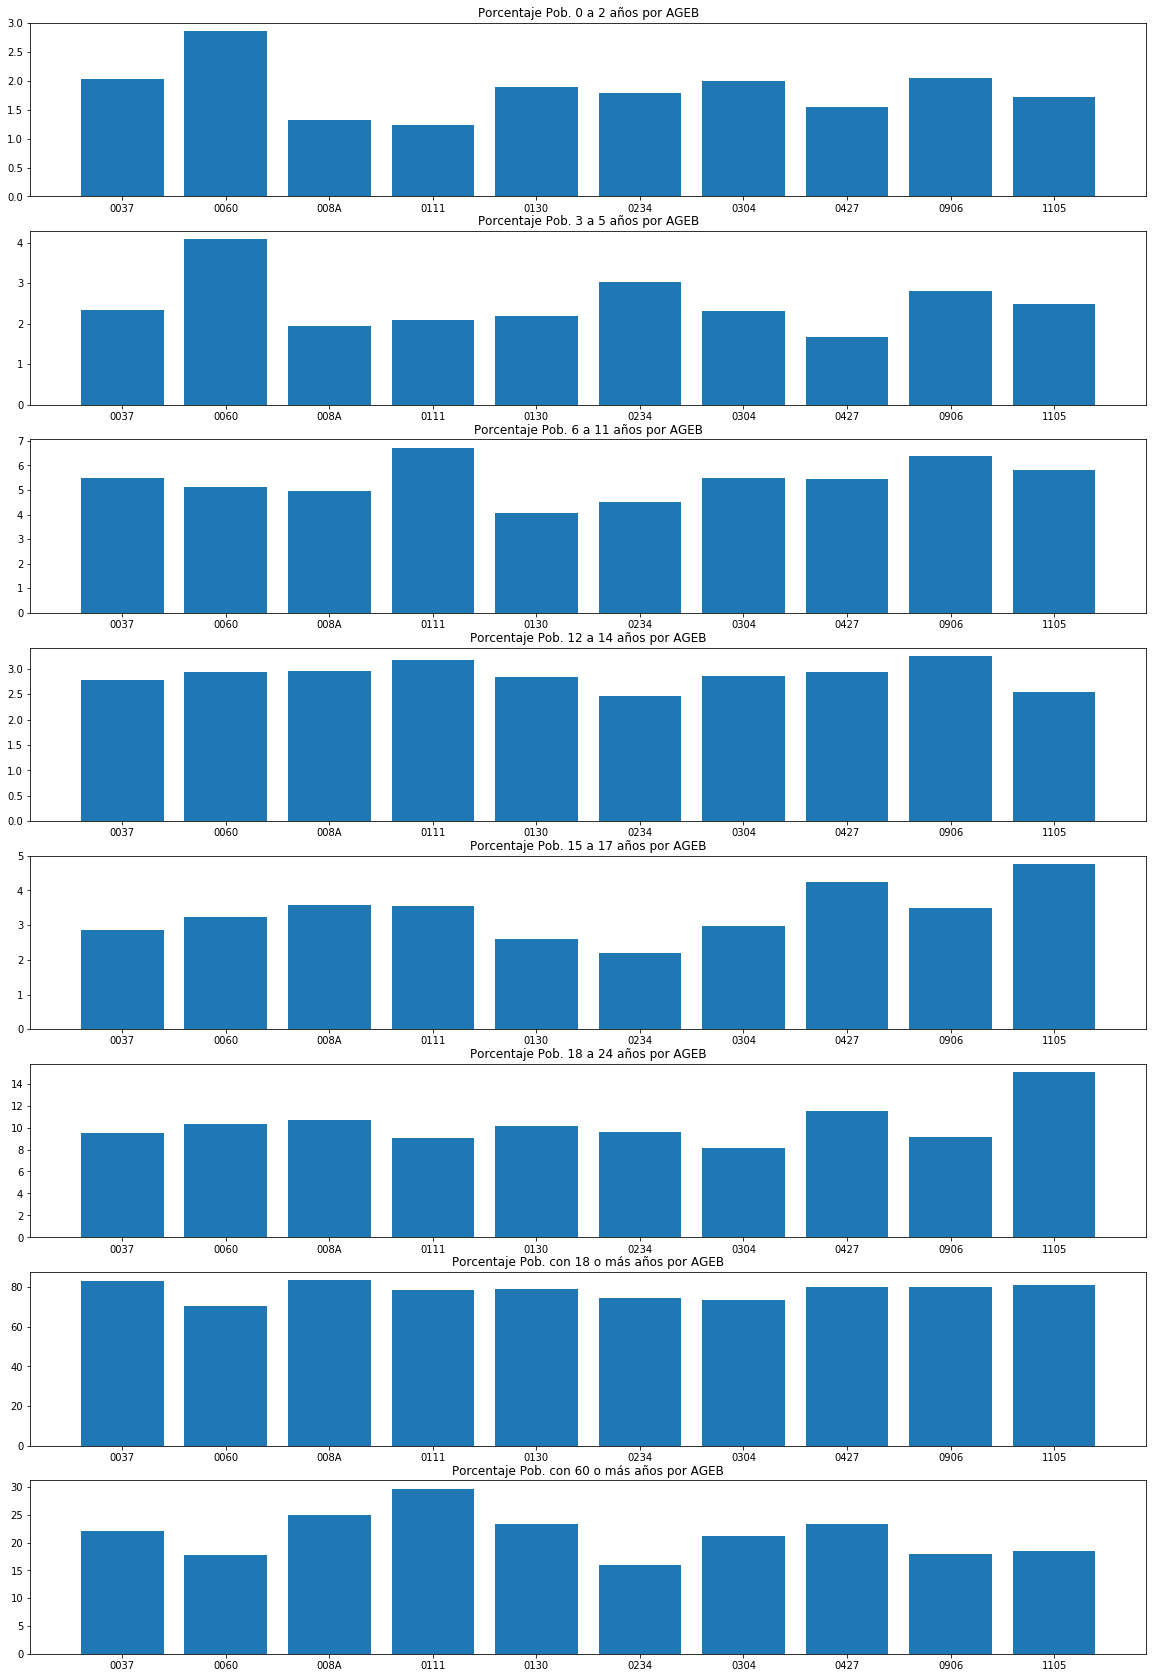

In [25]:
fig, (pob02, pob35, pob611, pob1214, pob1517, pob1824, pob18mas, pob60mas) = plt.subplots(8, figsize=(20,30))

pob02.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 0 a 2 años'])
pob02.set_title('Porcentaje Pob. 0 a 2 años por AGEB')

pob35.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 3 a 5 años'])
pob35.set_title('Porcentaje Pob. 3 a 5 años por AGEB')

pob611.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 6 a 11 años'])
pob611.set_title('Porcentaje Pob. 6 a 11 años por AGEB')

pob1214.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 12 a 14 años'])
pob1214.set_title('Porcentaje Pob. 12 a 14 años por AGEB')

pob1517.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 15 a 17 años'])
pob1517.set_title('Porcentaje Pob. 15 a 17 años por AGEB')

pob1824.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 18 a 24 años'])
pob1824.set_title('Porcentaje Pob. 18 a 24 años por AGEB')

pob18mas.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. con 18 o más años'])
pob18mas.set_title('Porcentaje Pob. con 18 o más años por AGEB')

pob60mas.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. con 60 o más años'])
pob60mas.set_title('Porcentaje Pob. con 60 o más años por AGEB')

plt.show()

In [26]:
filtro_actividades = actividades_csv.loc[(actividades_csv['ENTIDAD'] == int(Estado)) & (actividades_csv['MUN'] == int(Municipio))]
filtro_actividades_10 = filtro_actividades.loc[filtro_actividades['AGEB'].isin(ageb_keys)]

# filtro_actividades_10

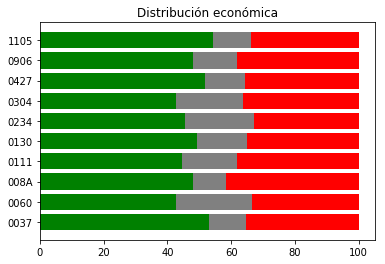

In [27]:
dic = {}

for i in filtro_actividades_10['Porcentaje Pob. Activa'].keys():
    arr = []
    arr.append(filtro_actividades_10['Porcentaje Pob. Activa'].loc[i])
    arr.append(100 - (filtro_actividades_10['Porcentaje Pob. Activa'].loc[i] + filtro_actividades_10['Porcentaje Pob. Inactiva'].loc[i]))
    arr.append(filtro_actividades_10['Porcentaje Pob. Inactiva'].loc[i])
    dic[filtro_actividades_10['AGEB'].loc[i]] = arr
    
list_value = np.array(list(dic.values()))
list_inv = list(list_value.cumsum(axis=1))
list_key = list(filtro_actividades_10['AGEB'])

for i in range(len(list_key)):
    plt.barh(list_key[i], list_value[i], left=list_inv[i]-list_value[i], color=['green', 'grey', 'red'])
    
plt.title("Distribución económica")
plt.show()


In [28]:
# Nivel Socioeconómico by Erick

In [29]:
keys = ['ENTIDAD', 
       'NOM_ENT',
       'MUN', 
       'NOM_MUN', 
       'LOC', 
       'NOM_LOC',
       'AGEB', 
       'GRAPROES',
       'Viviendas que no disponen de excusado o sanitario', 
       'Viviendas que no disponen de lavadora',
       'Viviendas que no disponen de refrigerador',
       'Viviendas que no disponen de teléfono fijo',
       'Viviendas con piso de tierra',
       'Viviendas que no disponen de agua entubada de la red pública',
       'Viviendas que no disponen de drenaje',
       'Viviendas que no disponen de energía eléctrica']
nivel_socio_df = filtro_mun[keys].copy()
# nivel_socio_df.head()

In [30]:
# max_graproes = nivel_socio_df.loc[nivel_socio_df['GRAPROES'] == nivel_socio_df['GRAPROES'].max()].copy()
max_graproes = nivel_socio_df.loc[nivel_socio_df['AGEB'].isin(ageb_keys)]
max_graproes = max_graproes.sort_values(by='GRAPROES',ascending=False)
# max_graproes

In [31]:
max_graproes['Promedio Total'] = max_graproes[keys[8:]].mean(axis=1)
# max_graproes

In [32]:
# Filtar por mayor grado de escolaridad
max_graproes = max_graproes.loc[max_graproes['GRAPROES'] == max_graproes['GRAPROES'].max()]
max_graproes

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,GRAPROES,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica,Promedio Total
124,9,Distrito Federal,3,Coyoacán,1,Total AGEB urbana,0234,15.0,0.0,6.4,0.5,3.9,0.0,0.0,0.0,0.0,1.35


In [33]:
min_ave = max_graproes['Promedio Total'].idxmin()

# Mejor AGEB por porcentaje más bajo
max_graproes.loc[min_ave]

ENTIDAD                                                                         9
NOM_ENT                                                          Distrito Federal
MUN                                                                             3
NOM_MUN                                                                  Coyoacán
LOC                                                                             1
NOM_LOC                                                         Total AGEB urbana
AGEB                                                                         0234
GRAPROES                                                                       15
Viviendas que no disponen de excusado o sanitario                               0
Viviendas que no disponen de lavadora                                         6.4
Viviendas que no disponen de refrigerador                                     0.5
Viviendas que no disponen de teléfono fijo                                    3.9
Viviendas con pi

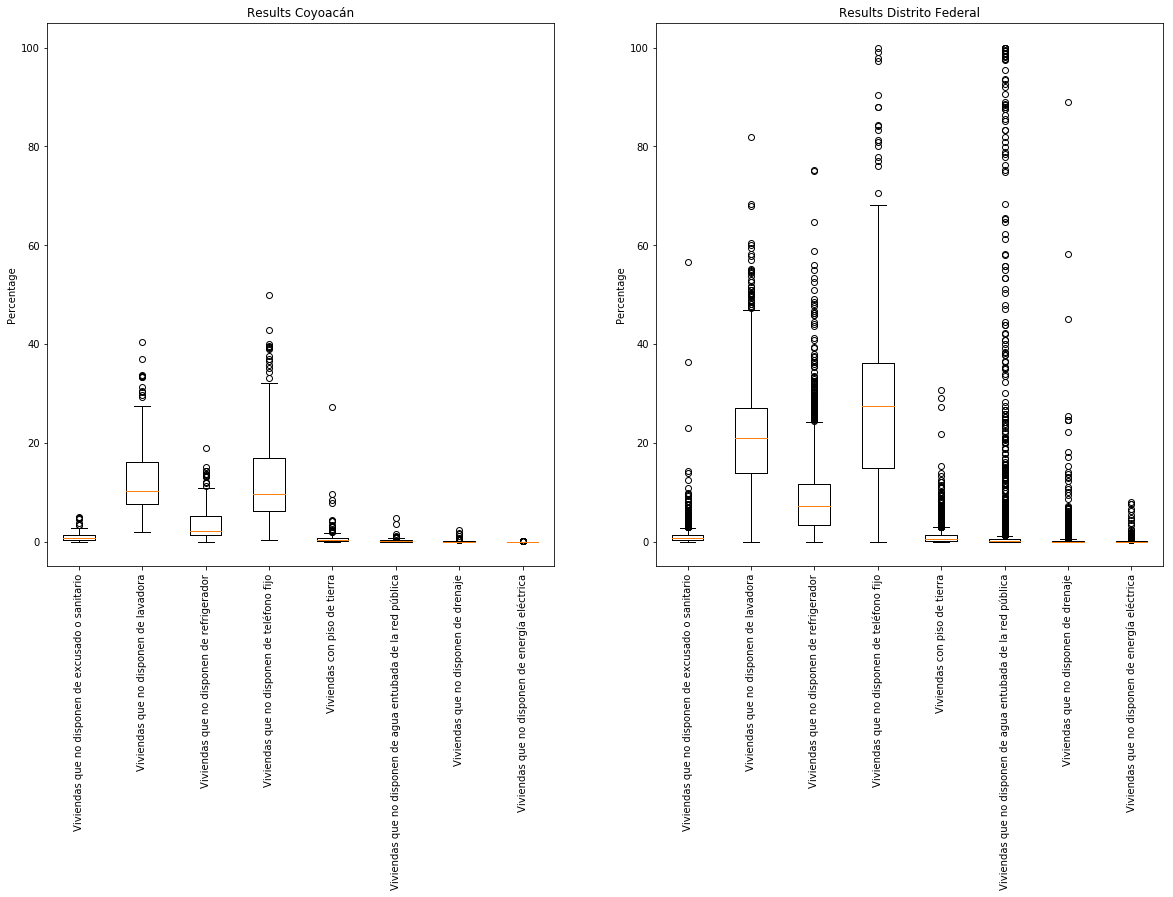

In [34]:
# Generar gráficas para comparar Viviendas

data = [nivel_socio_df[k] for k in keys[8:]]
data_est = [filtro_estado[ke].loc[filtro_estado[ke].notnull()] for ke in keys[8:]]

fig, (box, box_est) = plt.subplots(1, 2, figsize=(20,10))

box.boxplot(data, labels=keys[8:])
box.set_title(f"Results {max_graproes.loc[min_ave]['NOM_MUN']}")
box.set_ylabel("Percentage")
box.set_xticklabels(labels=keys[8:],rotation=90)
box.set_ylim((-5,105))
              
# Resultados a nivel estatal

box_est.boxplot(data_est, labels=keys[8:])
box_est.set_title(f"Results {filtro_estado.loc[min_ave]['NOM_ENT']}")
box_est.set_ylabel("Percentage")  
box_est.set_xticklabels(labels=keys[8:], rotation=90)
box_est.set_ylim((-5,105))

plt.show()
             

In [35]:
# Código by Ricardo

gran_tabla = pd.read_csv("Table/GranTablaCDMX&Metro.csv", usecols = ['ENTIDAD','NOM_ENT','MUN','NOM_MUN','AGEB','POBTOT','PSINDER','PDER_SS'])


In [36]:
gran_tabla['PSINDER'] = gran_tabla['PSINDER'].replace('*','NaN')
gran_tabla['PSINDER'] = gran_tabla['PSINDER'].astype(float)

gran_tabla['PDER_SS'] = gran_tabla['PDER_SS'].replace('*','NaN')
gran_tabla['PDER_SS'] = gran_tabla['PDER_SS'].astype(float)

gran_tabla['Sin Salud'] = gran_tabla['PSINDER']/gran_tabla['POBTOT']

gran_tabla['Con Salud'] = gran_tabla['PDER_SS']/gran_tabla['POBTOT']

In [37]:
delegaciones_group = gran_tabla.groupby("NOM_MUN")
Sin_Salud = delegaciones_group["Sin Salud"].mean()

Con_Salud = delegaciones_group["Con Salud"].mean()
delegaciones  = gran_tabla.drop_duplicates("NOM_MUN")

In [38]:
municipios_2 = delegaciones.loc[:,"NOM_MUN"]

nuevos_municipios = municipios_2.reset_index()

In [39]:
Azca = gran_tabla.loc[gran_tabla["NOM_MUN"] == "Azcapotzalco",["NOM_MUN","POBTOT"]]

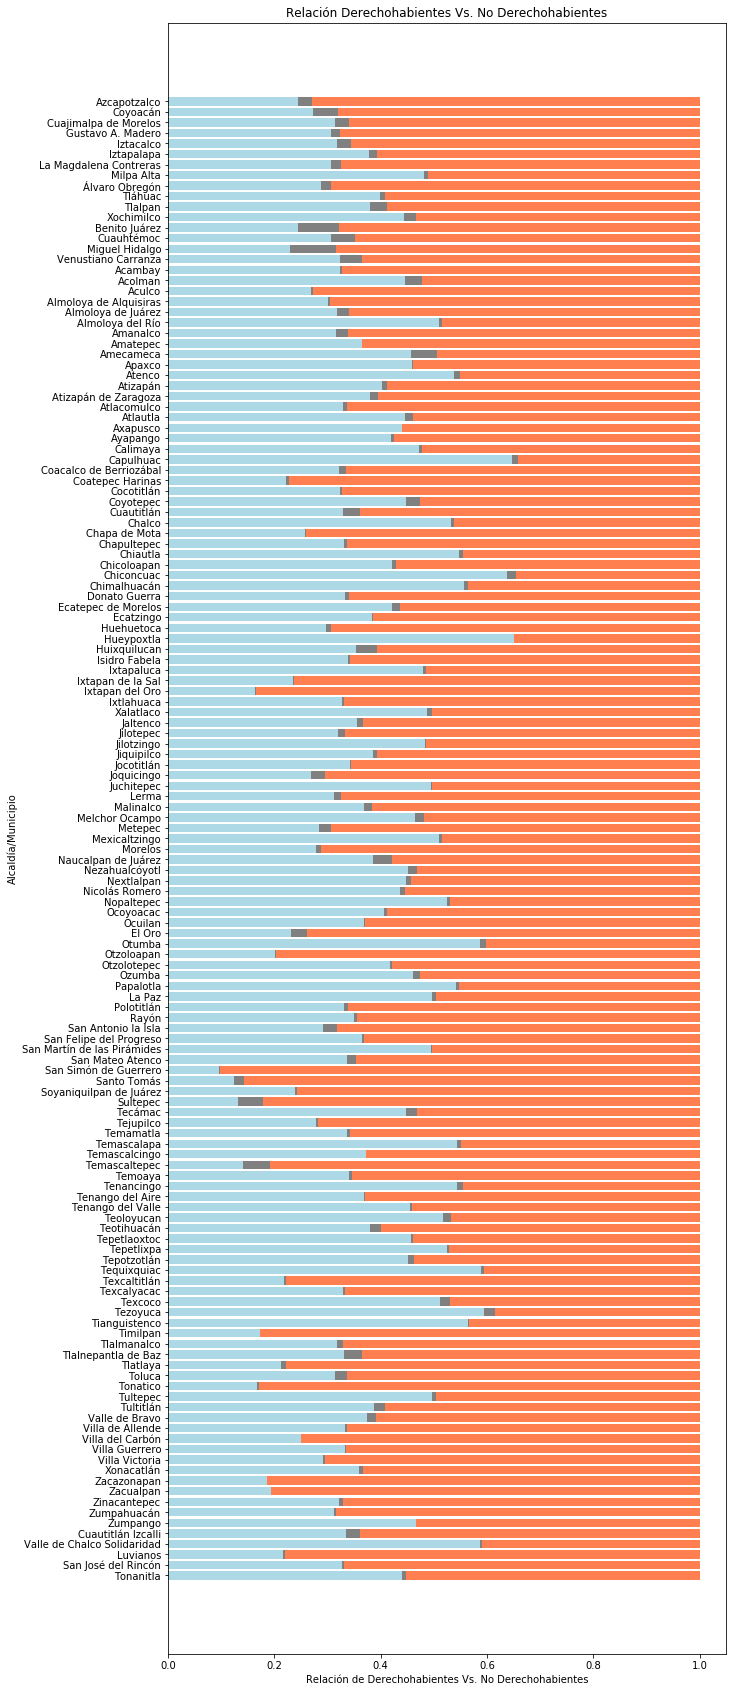

In [40]:
dic = {}
arr = []

for k in nuevos_municipios["NOM_MUN"]:
    arr = []
    arr.append(Con_Salud[k])
    arr.append(1 - (Con_Salud[k] + Sin_Salud[k]))
    arr.append(Sin_Salud[k])
    dic[k] = arr

list_val = np.array(list(dic.values()))
list_val = np.flip(list_val)
list_inv = list_val.cumsum(axis=1)
list_key = list(dic.keys())
list_key.reverse()

plt.figure(figsize=(10,30)) 

for i in range(len(list_key)):
    plt.barh(list_key[i], list_val[i], left=list_inv[i]-list_val[i],color=["lightblue", 'grey', "coral"], label=list_key[i])
plt.title("Relación Derechohabientes Vs. No Derechohabientes")
plt.xlabel('Relación de Derechohabientes Vs. No Derechohabientes')
plt.ylabel('Alcaldía/Municipio')

plt.show()
# plt.savefig("Derechohabiencia_por_Alcaldía_Munucipio_AMCDMX.png")

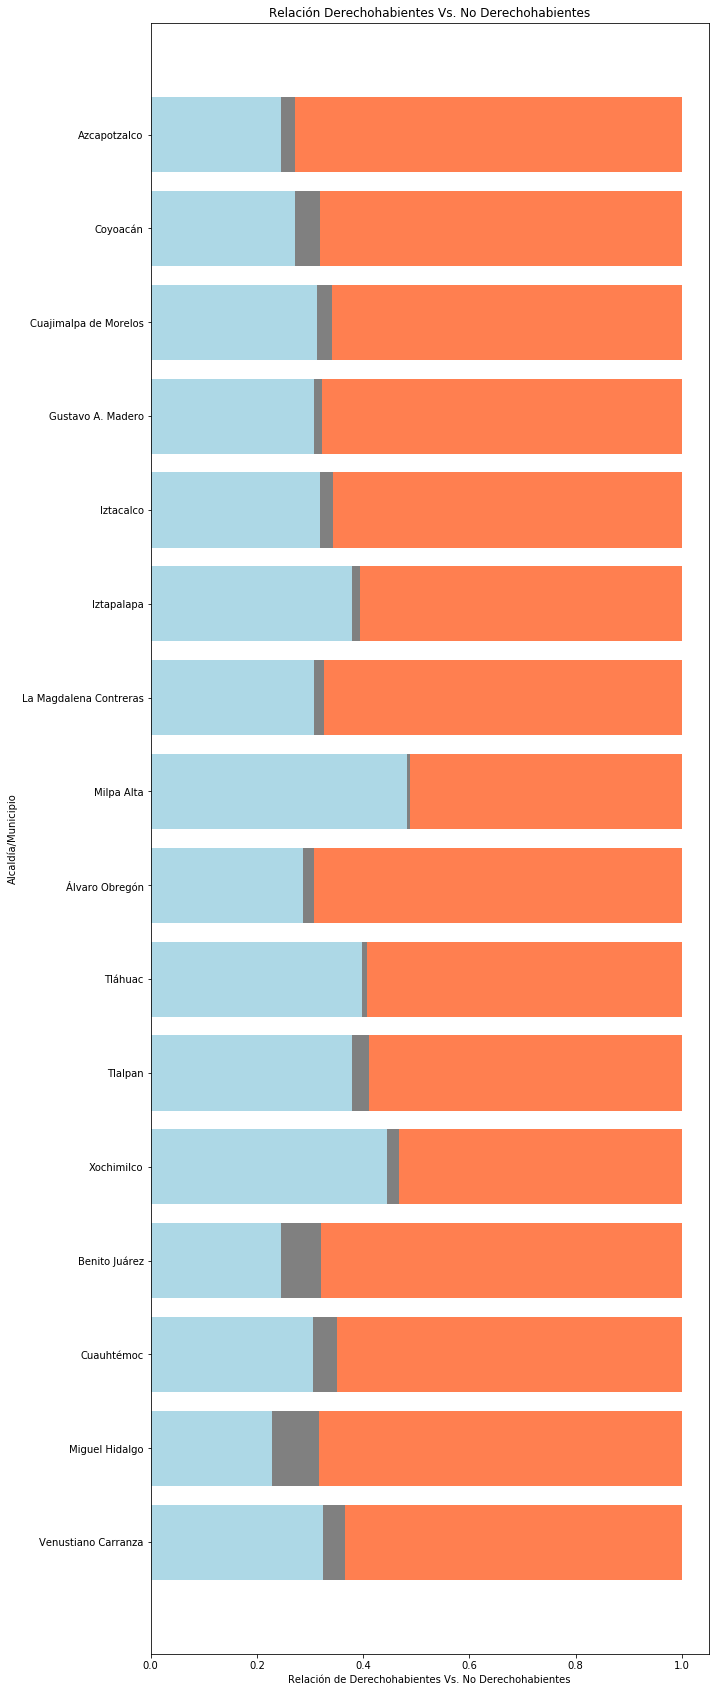

In [41]:
dic = {}
arr = []

per_state = delegaciones.loc[delegaciones['ENTIDAD'] == int(Estado)]

for k in per_state["NOM_MUN"]:
    arr = []
    arr.append(Con_Salud[k])
    arr.append(1 - (Con_Salud[k] + Sin_Salud[k]))
    arr.append(Sin_Salud[k])
    dic[k] = arr

list_val = np.array(list(dic.values()))
list_val = np.flip(list_val)
list_inv = list_val.cumsum(axis=1)
list_key = list(dic.keys())
list_key.reverse()

plt.figure(figsize=(10,30)) 

for i in range(len(list_key)):
    plt.barh(list_key[i], list_val[i], left=list_inv[i]-list_val[i],color=["lightblue", 'grey', "coral"], label=list_key[i])
plt.title("Relación Derechohabientes Vs. No Derechohabientes")
plt.xlabel('Relación de Derechohabientes Vs. No Derechohabientes')
plt.ylabel('Alcaldía/Municipio')

plt.show()
# plt.savefig("Salud_Por_Alcaldía_CDMX.png")

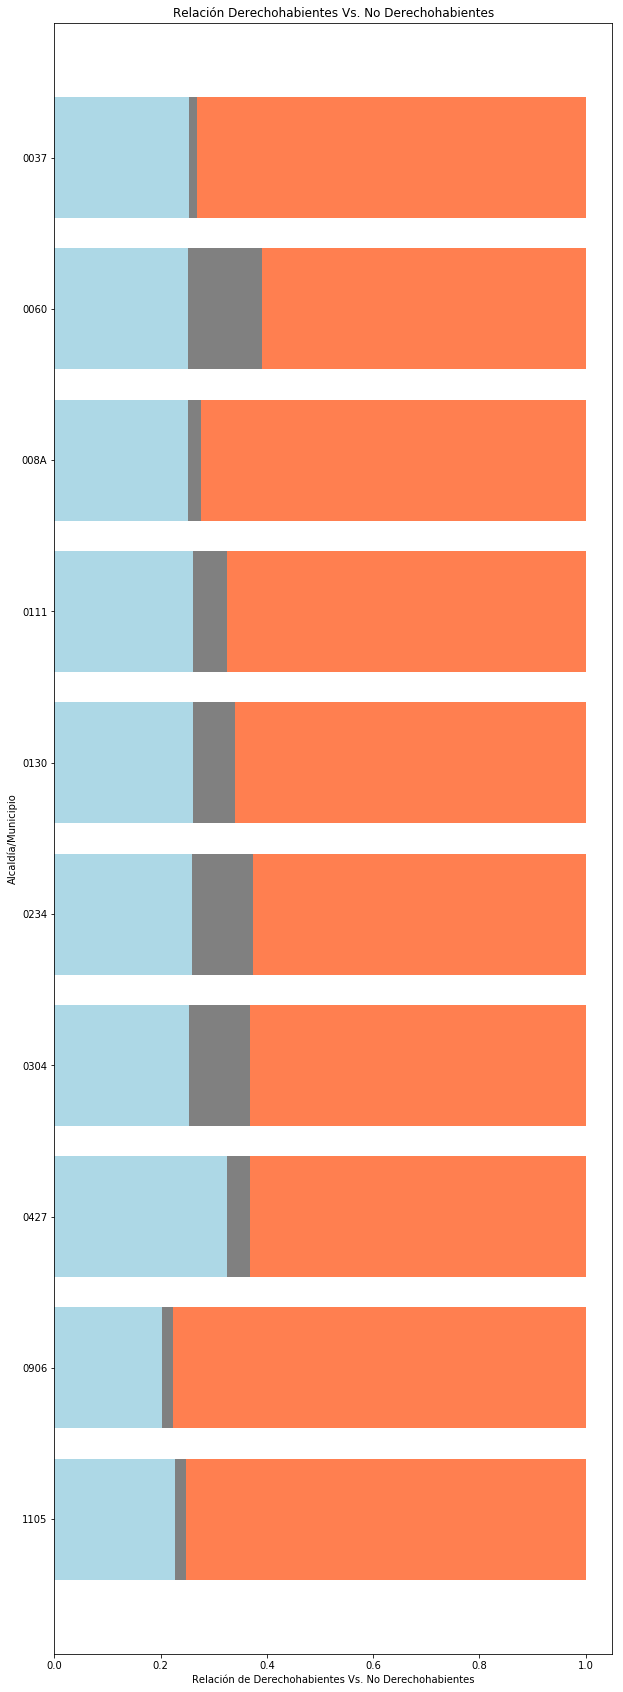

In [42]:
dic = {}
arr = []

per_state = gran_tabla.loc[(gran_tabla['ENTIDAD'] == int(Estado)) & (gran_tabla['MUN'] == int(Municipio))]
per_state = per_state.loc[per_state['AGEB'].isin(ageb_keys)]

for k in per_state["AGEB"]:
    arr = []
    arr.append(per_state['Con Salud'].loc[per_state['AGEB'] == k].values[0])
    arr.append(1 - (per_state['Con Salud'].loc[per_state['AGEB'] == k].values[0] + per_state['Sin Salud'].loc[per_state['AGEB'] == k].values[0]))
    arr.append(per_state['Sin Salud'].loc[per_state['AGEB'] == k].values[0])
    dic[k] = arr
    
list_val = np.array(list(dic.values()))
list_val = np.flip(list_val)
list_inv = list_val.cumsum(axis=1)
list_key = list(dic.keys())
list_key.reverse()

plt.figure(figsize=(10,30)) 

for i in range(len(list_key)):
    plt.barh(list_key[i], list_val[i], left=list_inv[i]-list_val[i],color=["lightblue", 'grey', "coral"], label=list_key[i])

plt.title("Relación Derechohabientes Vs. No Derechohabientes")
plt.xlabel('Relación de Derechohabientes Vs. No Derechohabientes')
plt.ylabel('Alcaldía/Municipio')

plt.show()
# plt.savefig("Salud_Por_AGEB.png")

In [43]:
# Coordenadas by Ariadna

In [44]:
# Read AGEBs'shapefile
cdmx = "Shapefiles/Shapefiles/09a.shp"
edomex = "Shapefiles/Shapefiles/15a.shp"
cdmx_st = "Shapefiles/Shapefiles/09ent.shp"
edomex_st = "Shapefiles/Shapefiles/15ent.shp"

map_cdmx = gpd.read_file(cdmx)
map_edomex = gpd.read_file(edomex)
map_cdmx_st = gpd.read_file(cdmx_st)
map_edomex_st = gpd.read_file(edomex_st)

In [45]:
map_cdmx.crs 

# Change to Web Mercator projection
map_cdmx = map_cdmx.to_crs({'init': 'epsg:4326'})
map_edomex = map_edomex.to_crs({'init': 'epsg:4326'})

map_cdmx_st = map_cdmx_st.to_crs({'init': 'epsg:4326'})
map_edomex_st = map_edomex_st.to_crs({'init': 'epsg:4326'})

In [46]:
# Count how many AGEBs
map_cdmx.count()
map_edomex.count()

# Count how many states
map_cdmx_st.count()
map_edomex_st.count()

CVEGEO      1
CVE_ENT     1
NOMGEO      1
geometry    1
dtype: int64

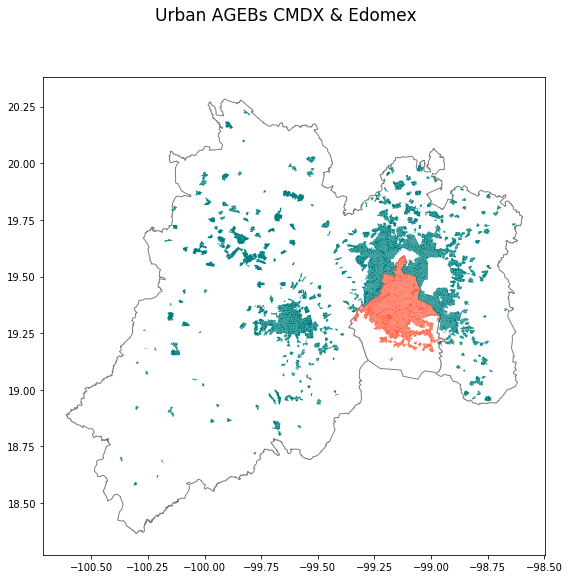

In [47]:
f, ax = plt.subplots(1, figsize=(9, 9))
f.suptitle('Urban AGEBs CMDX & Edomex', fontsize=17)

map_edomex_st.plot(facecolor='white', edgecolor='grey', ax=ax) # Edomex state layer
map_cdmx_st.plot(facecolor='white', edgecolor='grey', ax=ax) # CDMX state layer
map_cdmx.plot(facecolor='tomato',  ax=ax) # Edomex AGEBs layer
map_edomex.plot(facecolor='teal',  ax=ax) # CDMX AGEBs layer

plt.show()

In [48]:
## CDMX centroids

map_cdmx["lat"] = map_cdmx.centroid.map(lambda p: p.x)
map_cdmx["lon"] = map_cdmx.centroid.map(lambda p: p.y)

map_cdmx=map_cdmx.drop(['geometry', 'CVEGEO'], axis=1)

map_cdmx['CVE_AGEB'] = map_cdmx['CVE_AGEB'].astype(str)
map_cdmx['CVE_LOC'] = map_cdmx['CVE_LOC'].astype(str)
map_cdmx['CVE_MUN'] = map_cdmx['CVE_MUN'].astype(str)
map_cdmx['CVE_ENT'] = map_cdmx['CVE_ENT'].astype(str)

## Edomex centroids

map_edomex["lat"] = map_edomex.centroid.map(lambda p: p.x)
map_edomex["lon"] = map_edomex.centroid.map(lambda p: p.y)

map_edomex=map_edomex.drop(['geometry', 'CVEGEO'], axis=1)

map_edomex['CVE_AGEB'] = map_edomex['CVE_AGEB'].astype(str)
map_edomex['CVE_LOC'] = map_edomex['CVE_LOC'].astype(str)
map_edomex['CVE_MUN'] = map_edomex['CVE_MUN'].astype(str)
map_edomex['CVE_ENT'] = map_edomex['CVE_ENT'].astype(str)

 
# map_cdmx.head()

In [49]:
map_2states=map_cdmx.append(map_edomex)
map_2states
map_2states.to_csv('Table/coordenadas.csv')

In [50]:
# Google places
#Base de Longuitud y Latitud
latlng_pd = pd.read_csv("Table/coordenadas.csv")
latlng_pd.columns
latlng_pd = latlng_pd.iloc[:,1:7]
# latlng_pd=latlng_pd.iloc[11:21,1:10]
latlng_pd = latlng_pd.loc[(latlng_pd['CVE_ENT'] == int(Estado)) & (latlng_pd['CVE_MUN'] == int(Municipio))]
latlng_pd = latlng_pd.loc[latlng_pd['CVE_AGEB'].isin(ageb_keys)]
#latlng_pd['CVE_AGEB'] = latlng_pd['CVE_AGEB'].str.zfill(4)
latlng_pd

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,lat,lon
108,9,3,1,0111,-99.176696,19.348690
110,9,3,1,0906,-99.120793,19.318941
115,9,3,1,1105,-99.194793,19.306619
118,9,3,1,0037,-99.161689,19.354569
126,9,3,1,0060,-99.147848,19.353595
130,9,3,1,008A,-99.132892,19.352532
136,9,3,1,0130,-99.165115,19.348268
139,9,3,1,0234,-99.182541,19.344130
194,9,3,1,0304,-99.146046,19.339329
200,9,3,1,0427,-99.170008,19.339703


In [51]:
target_search=input("What you want to search: ")
target_type=input("What is your business type: ")

What you want to search: cafe
What is your business type: restaurant


In [52]:

# geocoordinates
target_coordinates = ""#19.2762739, -99.1362978"
target_radius = 800


# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
#response = requests.get(base_url, params=params)


In [53]:
for index, row in latlng_pd.iterrows():
    # get lat, lng from df
    lat = row["lat"]
    lng = row["lon"]
    # change location each iteration while leaving original params in place
    params["location"] = f"{lng},{lat}"
    # make request and print url
    response = requests.get(base_url, params=params)
    places_data = response.json()
    latlng_pd.loc[index, "Located nearby Businesses"] = len(places_data["results"])

In [54]:
latlng_pd

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,lat,lon,Located nearby Businesses
108,9,3,1,0111,-99.176696,19.348690,15.0
110,9,3,1,0906,-99.120793,19.318941,8.0
115,9,3,1,1105,-99.194793,19.306619,7.0
118,9,3,1,0037,-99.161689,19.354569,20.0
126,9,3,1,0060,-99.147848,19.353595,13.0
130,9,3,1,008A,-99.132892,19.352532,4.0
136,9,3,1,0130,-99.165115,19.348268,19.0
139,9,3,1,0234,-99.182541,19.344130,18.0
194,9,3,1,0304,-99.146046,19.339329,9.0
200,9,3,1,0427,-99.170008,19.339703,15.0
